In [182]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib  inline

In [183]:
ecommerce = pd.read_csv('E-Com_Data.csv')
ecommerce.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,5/10/2017,2,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12/10/2017,2,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10/10/2017,2,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [184]:
ecommerce.shape

(537979, 12)

# Data Understanding 

In [185]:
def summary(ecommerce, pred=None):
    obs = ecommerce.shape[0]
    types = ecommerce.dtypes
    counts = ecommerce.apply(lambda x: x.count())
    min_vals = ecommerce.apply(lambda x: x.min() if x.dtype.kind in 'biufc' else None)
    uniques = ecommerce.apply(lambda x: x.nunique())
    nulls = ecommerce.apply(lambda x: x.isnull().sum())

    print("Data Shape:", ecommerce.shape)

    if pred is None:
        cols = ['types', 'counts', 'uniques', 'nulls', 'min']
        summary_df = pd.concat([types, counts, uniques, nulls, min_vals], axis=1)
        summary_df.columns = cols
    
    dtypes = summary_df['types'].value_counts()
    print('______________________\nData Types:')
    
    return summary_df

details = summary(ecommerce)
display(details.sort_values(by='nulls', ascending=False))


Data Shape: (537979, 12)
______________________
Data Types:


,types,counts,uniques,nulls,min
Sold as set,float64,0,0,537979,NaN
Reason of return,object,3,2,537976,NaN
Cancelled_status,object,8345,1,529634,NaN
CustomerID,float64,404189,4349,133790,2.0
Item Code,object,537979,4009,0,NaN
InvoieNo,int64,537979,24928,0,361429.0
Date of purchase,object,537979,381,0,NaN
Quantity,int64,537979,462,0,-2003.0
Time,object,537979,770,0,NaN
price per Unit,float64,537979,2900,0,1.0


In [186]:
ecommerce.isnull().sum().sum()

1739379

In [187]:
ecommerce['Date of purchase'] = pd.to_datetime(ecommerce['Date of purchase'], format='mixed')

In [188]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    object        
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 49.3+ MB


In [189]:
print("Min Date : ", ecommerce['Date of purchase'].min())
print()
print("Max Date : ", ecommerce['Date of purchase'].max())

Min Date :  2016-02-12 00:00:00

Max Date :  2017-12-19 00:00:00


In [190]:
ecommerce.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [191]:
ecommerce.duplicated().sum()

9

In [192]:
ecommerce = ecommerce.drop_duplicates(ignore_index = True)

In [193]:
ecommerce.duplicated().sum()

0

In [194]:
ecommerce1 = ecommerce[['CustomerID', 'InvoieNo', 'Date of purchase', 'Price']]

In [195]:
ecommerce1.shape

(537970, 4)

In [196]:
ecommerce1.duplicated().sum()

2863

In [197]:
ecommerce1 = ecommerce1.rename(columns = {'InvoieNo' : 'InvoiceNo', 'Date of purchase' : 'Date'})
ecommerce1.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,2017-10-29,1926.0
1,4352.0,394422,2017-05-10,1740.0
2,4352.0,394422,2017-12-10,1866.0
3,4352.0,388633,2017-08-22,1869.0
4,4352.0,394422,2017-10-10,1888.0


In [198]:
ecommerce1.isnull().sum()

CustomerID    133789
InvoiceNo          0
Date               0
Price              0
dtype: int64

In [199]:
ecommerce1.isnull().sum()/len(ecommerce1)*100

CustomerID    24.869231
InvoiceNo      0.000000
Date           0.000000
Price          0.000000
dtype: float64

## Data Cleaning

In [200]:
ecommerce1 = ecommerce1[~(ecommerce1.CustomerID.isnull())]
ecommerce1 = ecommerce1[~(ecommerce1.Price<0)]
ecommerce1 = ecommerce1[ecommerce1.Price>0]

details = summary(ecommerce1)
display(details.sort_values(by = 'uniques',ascending = False))

Data Shape: (395998, 4)
______________________
Data Types:


,types,counts,uniques,nulls,min
InvoiceNo,int64,395998,18305,0,361429.0
Price,float64,395998,8805,0,12.0
CustomerID,float64,395998,4324,0,2.0
Date,datetime64[ns],395998,381,0,NaN


In [201]:
ecommerce1.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [202]:
print("Min Date : ", ecommerce1['Date'].min())
print()
print("Max Date : ", ecommerce1['Date'].max())

Min Date :  2016-02-12 00:00:00

Max Date :  2017-12-19 00:00:00


In [203]:
import datetime
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

# Building RMF Analysis

In [204]:
RFMApproach = ecommerce1.groupby('CustomerID').agg({'Date' : lambda x : (new_date - x.max()).days, 'InvoiceNo' : lambda x : x.count(),
                                                   'Price' : lambda x : x.sum()})
RFMApproach

,Date,InvoiceNo,Price
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,77,166972.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,12,25177.0


In [205]:
RFMApproach.rename(columns = {'Date' : "Recency", 'InvoiceNo' : 'Frequency' , 'Price' : 'Monetary'}, inplace = True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,77,166972.0
...,...,...,...,...
4319,4368.0,17,10,20480.0
4320,4369.0,181,7,10774.0
4321,4370.0,12,12,25177.0
4322,4371.0,4,754,280608.0


In [206]:
RFMApproach.describe()

,Recency,Frequency,Monetary
count,4324.000000,4324.000000,4.324000e+03
mean,61.943571,91.581406,2.339841e+05
std,89.154543,228.617397,8.636663e+05
min,1.000000,1.000000,3.880000e+02
25%,10.000000,17.000000,3.928800e+04
50%,20.000000,41.000000,8.614700e+04
75%,75.000000,100.000000,2.108338e+05
max,617.000000,7837.000000,3.553619e+07


In [207]:
# Split the Data into 4 segment basis quantile method

quantiles = RFMApproach.quantile(q = [0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 20.0, 0.75: 75.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75}}

In [208]:
# For Prime Customer we should have Recency Low, Frequency High, Monetary High is our Target.

def recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [209]:
def freq_mont_value(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [210]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [211]:
RFMApproach['R'] = RFMApproach['Recency'].apply(recency_value, args = ('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(freq_mont_value, args = ('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(freq_mont_value, args = ('Monetary', quantiles))

In [212]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,2,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,77,166972.0,1,2,2
...,...,...,...,...,...,...,...
4319,4368.0,17,10,20480.0,2,4,4
4320,4369.0,181,7,10774.0,4,4,4
4321,4370.0,12,12,25177.0,2,4,4
4322,4371.0,4,754,280608.0,1,1,1


In [213]:
RFMApproach['RFM'] = RFMApproach[['R', 'F', 'M']].sum(axis = 1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,2,2,2,6
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,77,166972.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4319,4368.0,17,10,20480.0,2,4,4,10
4320,4369.0,181,7,10774.0,4,4,4,12
4321,4370.0,12,12,25177.0,2,4,4,10
4322,4371.0,4,754,280608.0,1,1,1,3


In [214]:
RFMApproach['RFM'].value_counts()

RFM
3     489
10    476
8     451
9     451
7     436
4     423
5     409
6     405
12    402
11    382
Name: count, dtype: int64

In [215]:
RFMApproach['RFM'].nunique()

10

In [216]:
# So RFM 3,4,5 are the best customers.

In [217]:
Loyality_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q = 4, labels = Loyality_Level)
RFMApproach['Loyalty_Level'] = score_cuts.values
RFMApproach.reset_index()
RFMApproach

,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty_Level
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,3,Platinum
3.0,77,27,257404.0,4,3,1,8,Silver
4.0,20,72,176613.0,2,2,2,6,Gold
5.0,18,16,41976.0,2,4,3,9,Silver
6.0,9,77,166972.0,1,2,2,5,Platinum
...,...,...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4,10,Silver
4369.0,181,7,10774.0,4,4,4,12,Bronze
4370.0,12,12,25177.0,2,4,4,10,Silver


In [218]:
RFMApproach.to_csv('segmentation_customer_details.csv')

In [219]:
RFMApproach['Loyalty_Level'].value_counts()

Loyalty_Level
Silver      1378
Platinum    1321
Gold         841
Bronze       784
Name: count, dtype: int64

## Visualization

In [220]:
RFMApproach.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyalty_Level'],
      dtype='object')

In [221]:
RFMApproach.head()
RFMApproach1 =RFMApproach.reset_index()

In [222]:
RFMApproach1.head(2)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,4,3,1,8,Silver


In [223]:
final_report = RFMApproach1.groupby('Loyalty_Level')[['Recency', 'Frequency', 'Monetary', 'CustomerID']].agg({'Recency' : 'sum', 'Frequency' : 'sum', 'Monetary' : 'sum', 'CustomerID' : 'nunique'}).reset_index()

In [224]:
final_report

,Loyalty_Level,Recency,Frequency,Monetary,CustomerID
0,Platinum,14217,294939,780238270.0,1321
1,Gold,20449,52785,117171734.0,841
2,Silver,103937,40354,94534935.1,1378
3,Bronze,129241,7920,19802491.0,784


In [225]:
final_report = final_report.rename(columns = {'CustomerID' : 'Numbuyers'})
final_report['Percent'] = round(final_report['Numbuyers']/final_report.Numbuyers.sum()*100,2)
final_report

,Loyalty_Level,Recency,Frequency,Monetary,Numbuyers,Percent
0,Platinum,14217,294939,780238270.0,1321,30.55
1,Gold,20449,52785,117171734.0,841,19.45
2,Silver,103937,40354,94534935.1,1378,31.87
3,Bronze,129241,7920,19802491.0,784,18.13


In [226]:
final_report1 = final_report[['Loyalty_Level', 'Numbuyers', 'Percent']]
final_report1

,Loyalty_Level,Numbuyers,Percent
0,Platinum,1321,30.55
1,Gold,841,19.45
2,Silver,1378,31.87
3,Bronze,784,18.13


In [227]:
!pip install squarify

In [228]:
import squarify

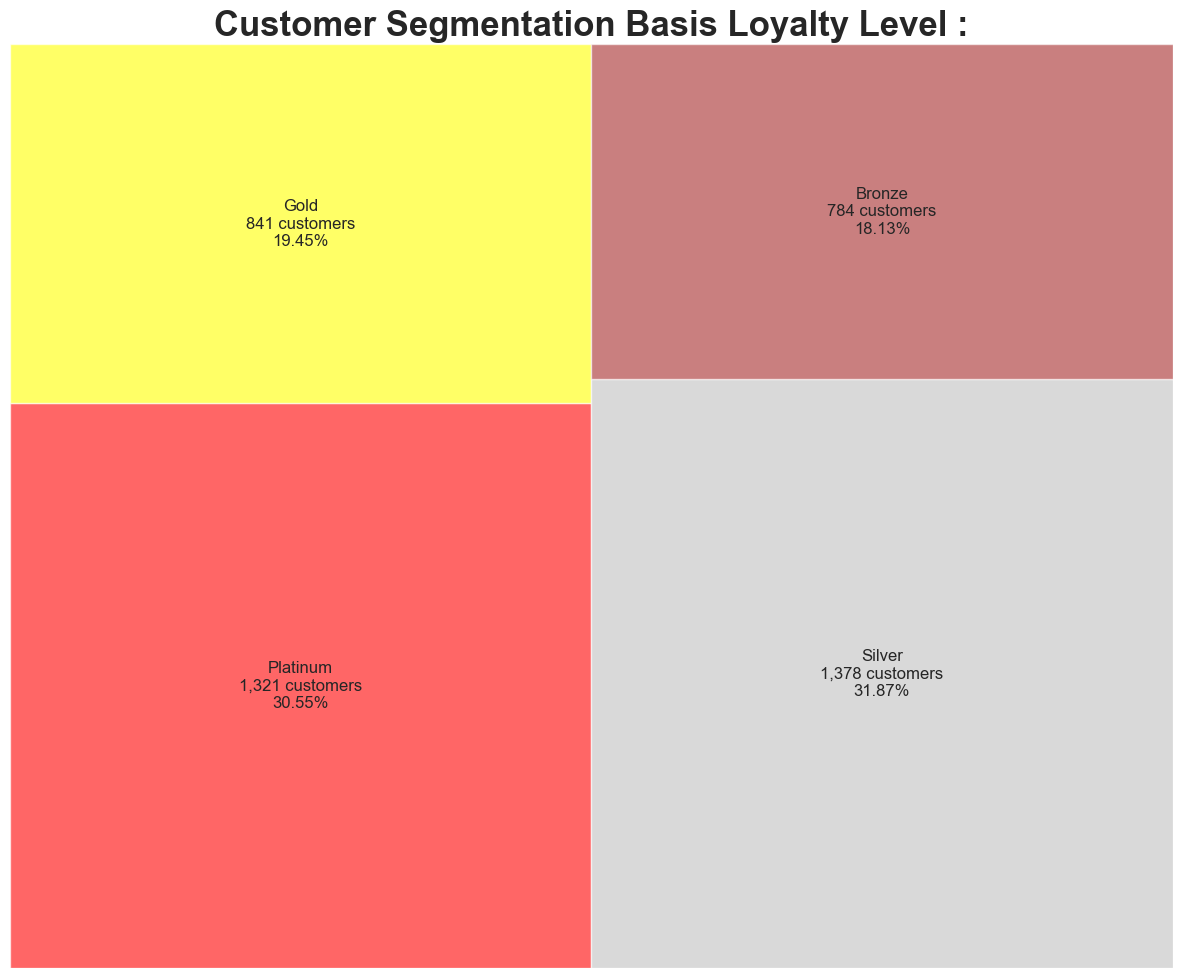

In [229]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)
colors_dics = {'Platinum' : 'red', 'Gold' : 'yellow', 'Silver' : 'silver', 'Bronze' : 'brown'}

colors = [colors_dics[level] for level in final_report1['Loyalty_Level']]
labels = [f"{row[0]}\n{row[1]:,.0f} customers\n{row[2]:.2f}%" for row in final_report1.itertuples(index=False)]
squarify.plot(sizes=final_report1['Numbuyers'], color=colors, label=labels, alpha=0.6)

plt.title("Customer Segmentation Basis Loyalty Level :", fontsize =25, fontweight = 'bold')
plt.axis('off')
plt.show()

# Model Building

## K Means Clustering and Hierarchical Cluster - Dendrogram 

In [280]:
RFMApproach.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,77,166972.0


In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RFM_scaled = scaler.fit_transform(RFMApproach[["Recency", "Frequency", "Monetary"]])

In [272]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(RFM_scaled)
    wcss.append(kmeans.inertia_)

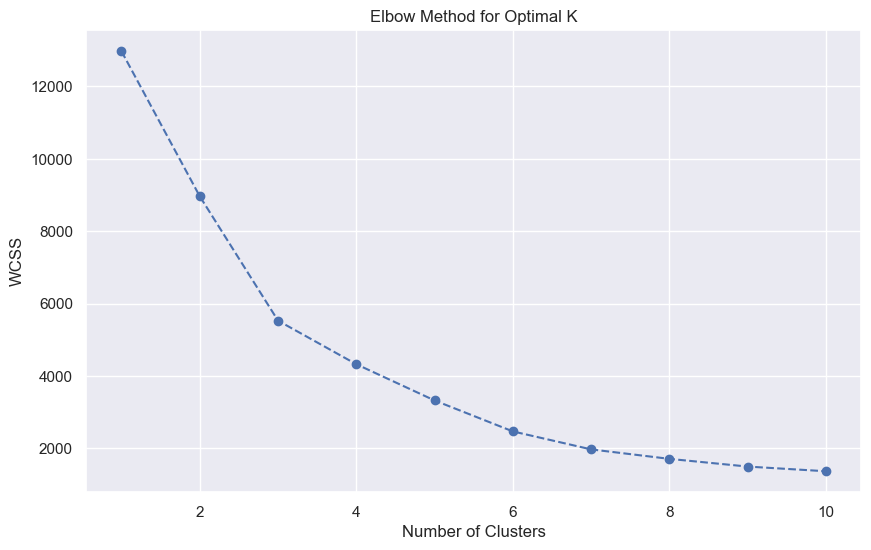

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [277]:
optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["KMeans_Cluster"] = kmeans.fit_predict(rfm_scaled)

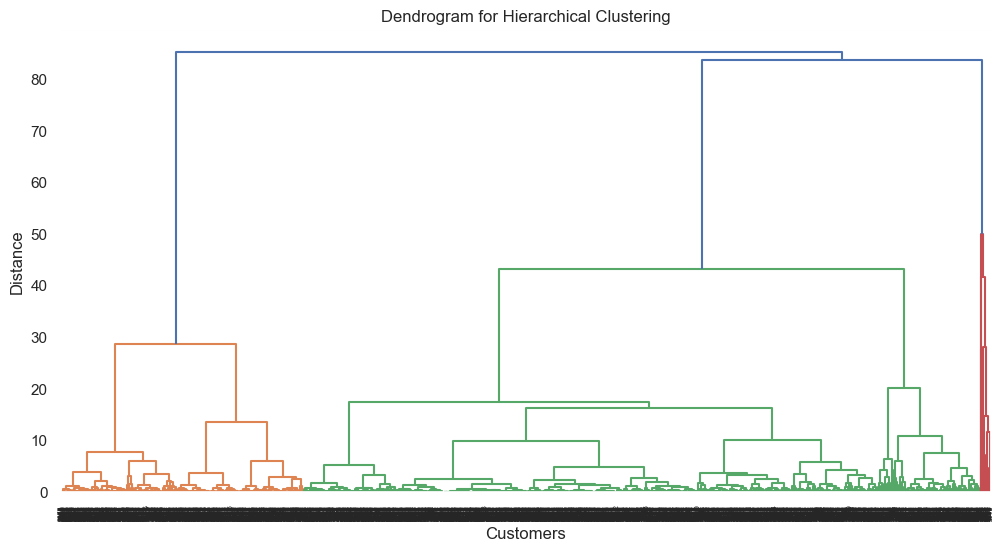

In [278]:
plt.figure(figsize=(12, 6))
dendrogram(linkage(rfm_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

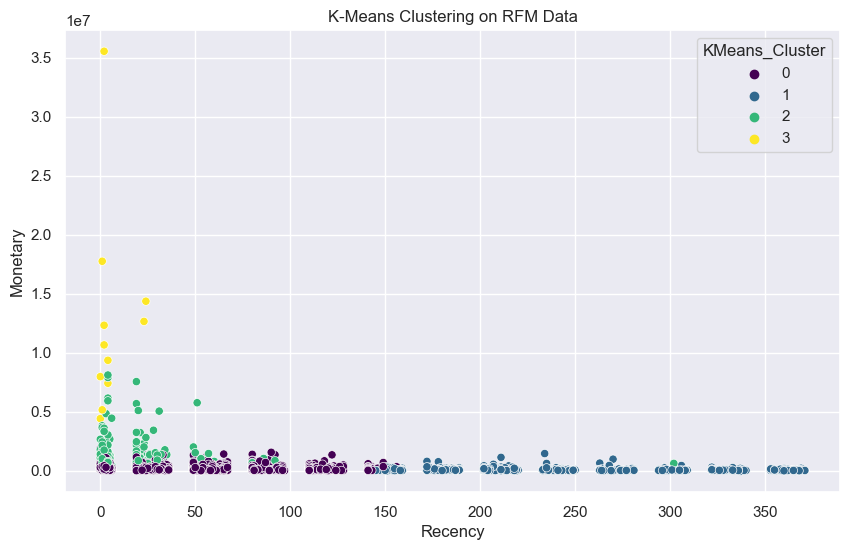

In [281]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="KMeans_Cluster", palette="viridis")
plt.title("K-Means Clustering on RFM Data")
plt.show()